In [1]:
import textworld
from textworld import GameMaker
from textworld.generator.data import KnowledgeBase
from textworld.generator.game import Event, Quest
from textworld.generator.game import GameOptions

# Make the generation process reproducible.
from textworld import g_rng  # Global random generator.
g_rng.set_seed(20180916)

In [2]:
from textworld.generator import compile_game
import io
import sys
import contextlib
import numpy as np

In [3]:
# GameMaker object for handcrafting text-based games.
# M = GameMaker()

In [4]:
def _compile_test_game(game):
    grammar_flags = {
        "theme": "house",
        "include_adj": False,
        "only_last_action": True,
        "blend_instructions": True,
        "blend_descriptions": True,
        "refer_by_name_only": True,
        "instruction_extension": []
    }
    rng_grammar = np.random.RandomState(1234)
    grammar = textworld.generator.make_grammar(grammar_flags, rng=rng_grammar)
    game.change_grammar(grammar)

    game_file = textworld.generator.compile_game(game)
    return game_file

In [10]:
def build_and_compile_super_hero_game_1():
    M = GameMaker()
    
    room_dr = M.new_room("Locker Room")
    room_mr = M.new_room("Meeting Room")
    room_fl = M.new_room("Field")
    team_mates = M.new(type='tm', name = "teammates")
    captain = M.new(type='tm3', name = "captain")
    room_dr.add(team_mates)
    room_mr.add(captain)
    corridor = M.connect(room_dr.east, room_mr.west)
    corridor1 = M.connect(room_mr.east, room_fl.west)
    #corridor2 = M.connect(room_fl.east, new_room.west)
    M.set_player(room_dr)

    team_mates_2 = M.new(type='tm2', name = "someone")
    room_dr.add(team_mates_2)

    game_gear = M.new(type='ap', name = "game gears")
    room_dr.add(game_gear)
    M.add_fact("not_equiped", game_gear)
    M.add_fact("not_participated", captain)
    M.add_fact("not_finished", captain)
    M.add_fact("not_denied", captain)
    
    M.add_fact("not_shared", captain)
    M.add_fact("not_attentive", captain)
    M.add_fact("not_annoyed", captain)
    
    M.add_fact("not_helped", team_mates)
    M.add_fact("not_disturbed", team_mates)
    M.add_fact("not_bully", team_mates)
    
    
    room_dr.infos.desc = "You are in the Locker room with your team mates. You will find your game gears here. Collect the game gears and wear them before the meeting. If you need help, ask help from others and be helpful to others as well. After you are done here, go to the meeting room."
    room_mr.infos.desc = "You are in the meeting room. A meeting is going to start to finalize the game plan. Join the meeting and try to share your thought. After the meeting go to east to the field."
    
    captain.infos.desc = "The meeting is leading by the captain. Please, Cooperate with him."
    
    failed_event_1 = Event(conditions={
        M.new_fact("not_equiped", game_gear),
        M.new_fact("at", M._entities['P'], room_mr)})
    
    failed_quest_1 = Quest(win_events=[],
                           fail_events=[failed_event_1])
    
    quest_event = Event(conditions={
        M.new_fact("equiped", game_gear),
        M.new_fact("participated", captain),
        M.new_fact("at", M._entities['P'], room_mr)})
    
    event_quest = Quest(win_events=[quest_event], reward=5)
    
    qst_event_win_1 = Event(conditions={M.new_fact("finished", captain),
                                     M.new_fact("participated", captain)})
    win_quest_1 = Quest(win_events=[qst_event_win_1], reward=1)
        
    quest_event_win_2 = Event(conditions={
        M.new_fact("finished", captain),
        M.new_fact("at", M._entities['P'], room_fl)})
    
    win_quest_2 = Quest(win_events=[quest_event_win_2], reward=5)
    
    failed_event_2 = Event(conditions={
        M.new_fact("not_finished", captain),
        M.new_fact("at", M._entities['P'], room_fl)})
    
    failed_quest_2 = Quest(win_events=[],
                           fail_events=[failed_event_2])
    
    failed_event_3 = Event(conditions={
        M.new_fact("participated", captain),
        M.new_fact("not_finished", captain),
        M.new_fact("at", M._entities['P'], room_dr)})
    
    failed_quest_3 = Quest(win_events=[],
                           fail_events=[failed_event_3])
    
    quest_event_win_3 = Event(conditions={
        M.new_fact("equiped", game_gear),
        M.new_fact("at", M._entities['P'], room_dr)})
    
    win_quest_3 = Quest(win_events=[quest_event_win_3], reward=1)
    
    quest_event_win_4 = Event(conditions={
        M.new_fact("equiped", game_gear),
        M.new_fact("at", M._entities['P'], room_mr)})
    
    win_quest_4 = Quest(win_events=[quest_event_win_4], reward=2)
    
    M.quests = [win_quest_1, win_quest_2, win_quest_3, win_quest_4, event_quest, failed_quest_1, failed_quest_2, failed_quest_3]
    game = M.build()
    game.main_quest = win_quest_2
    game_file = _compile_test_game(game)
    return game, game_file

In [11]:
build_and_compile_super_hero_game_1()

(<textworld.generator.game.Game at 0x7fdbbd0087d0>,
 './tw_games/a2df69f1-bcea-4d3b-8030-69dcd786da49.ulx')

In [8]:
import textworld
import textworld.gym
import gym
request_infos = textworld.EnvInfos(description=True, inventory=True, admissible_commands=True,won=True, lost=True, facts = True)

# Requesting additional information should be done when registering the game.
env_id = textworld.gym.register_game('tw_games/71f26185-c607-4690-9c32-458ba7eb19d0.ulx', request_infos)
env = gym.make(env_id)

obs, infos = env.reset()

In [9]:
try:
    done = False
    obs, _ = env.reset()
    print(obs)
    nb_moves = 0
    while not done:
        command = input("> ")
        obs, score, done, infos = env.step(command)
        print("admissible_commands: ",infos["admissible_commands"])
        print(obs)
        print("fact: ",infos["facts"])
        
        nb_moves += 1
except KeyboardInterrupt:
    pass  # Press the stop button in the toolbar to quit the game.

print("Played {} steps, scoring {} points.".format(nb_moves, score))




                    ________  ________  __    __  ________        
                   |        \|        \|  \  |  \|        \       
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$       
                      | $$   | $$__     \$$\/  $$   | $$          
                      | $$   | $$  \     >$$  $$    | $$          
                      | $$   | $$$$$    /  $$$$\    | $$          
                      | $$   | $$_____ |  $$ \$$\   | $$          
                      | $$   | $$     \| $$  | $$   | $$          
                       \$$    \$$$$$$$$ \$$   \$$    \$$          
              __       __   ______   _______   __        _______  
             |  \  _  |  \ /      \ |       \ |  \      |       \ 
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $

> annoy teammates with disturbing activities
admissible_commands:  ['do not give attention in the meeting', 'drop game gears', 'examine captain', 'get rid of the game gears', 'give attention in the meeting', 'go east', 'go west', 'leave the room after the meeting', 'look', 'share your ideas in the meeting', 'wait']


fact:  [Proposition('at', (Variable('P', 'P'), Variable('Meeting Room', 'r'))), Proposition('at', (Variable('someone', 'tm2'), Variable('Locker Room', 'r'))), Proposition('at', (Variable('captain', 'tm3'), Variable('Meeting Room', 'r'))), Proposition('at', (Variable('teammates', 'tm'), Variable('Locker Room', 'r'))), Proposition('east_of', (Variable('Field', 'r'), Variable('Meeting Room', 'r'))), Proposition('east_of', (Variable('Meeting Room', 'r'), Variable('Locker Room', 'r'))), Proposition('free', (Variable('Field', 'r'), Variable('Meeting Room', 'r'))), Proposition('free', (Variable('Locker Room', 'r'), Variable('Meeting Room', 'r'))), Proposition('free', (Variable('M

In [37]:
def get_facts(infos):
    str_facts = ""
    for each_fact in infos['facts']:
            fact = each_fact.name
            if "at" != fact and "east_of" != fact and "free" != fact and "west_of" != fact and "in" != fact:
                str_facts += fact + " "
    
    str_facts = str_facts.strip()
    return str_facts


In [39]:
get_facts(infos)

'not_attentive not_bully not_denied not_disturbed not_helped not_shared equiped participated finished'

In [18]:
obs, _ = env.reset()
obs, score, done, infos = env.step(command)

In [33]:
for each_fact in infos['facts']:
    fact = each_fact.name
    if "at" != fact and "east_of" != fact and "free" != fact and "west_of" != fact and "in" != fact:
        print(fact)

not_attentive
not_bully
not_denied
not_disturbed
not_equiped
not_finished
not_helped
not_participated
not_shared


In [ ]:
disturb your team mates while they are doing works
make fun of others
wear the game gears
get rid of the game gears
avoid joining the meeting
leave the room after the meeting


# Defining the layout of the world

In [4]:
M = GameMaker()
room_dr = M.new_room("Dressing Room")
room_mr = M.new_room("Meeting Room")
room_fl = M.new_room("Field")
team_mates = M.new(type='tm', name = "team mates")
captain = M.new(type='tm3', name = "captain")
room_dr.add(team_mates)
room_mr.add(captain)
corridor = M.connect(room_dr.east, room_mr.west)
corridor1 = M.connect(room_mr.east, room_fl.west)
#corridor2 = M.connect(room_fl.east, new_room.west)
M.set_player(room_dr)
M.render()

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 81


In [ ]:
team_mates_2 = M.new(type='tm2', name = "someone")
room_dr.add(team_mates_2)

game_gear = M.new(type='ap', name = "game gears")
room_dr.add(game_gear)
M.add_fact("not_equiped", game_gear)
M.add_fact("not_participated", captain)
M.add_fact("not_helped", team_mates)
M.add_fact("not_disturbed", team_mates)
M.add_fact("not_bully", team_mates)
M.render()

In [ ]:
# roomA.infos.desc = "You are in a road. Some mobs are planning to rob a bank. You need to stop them. Go east to the alley. You can find a person in the alley who has information about the roberry. Collect information from him and prevent the roberry."
# alley.infos.desc = "There is a person beside the table in the alley. You can find an oven here as well."
# supporter = M.new(type='s', name = "table")  # When not provided, names are automatically generated.
# alley.add(supporter)  # Supporters are fixed in place.
# supporter.infos.desc = "It is a metal sturdy table. There are some food on the table"
# food = M.new(type="f", name = 'carrot') 
# food.infos.desc = "It's carrot"
# stove = M.new(type="oven", name = "oven")
# stove.infos.desc = "this is an oven. you can cook your food"
# supporter.add(food)  # When added directly to a room, portable objects are put on the floor.
# #supporter.add(stove)
# alley.add(stove)
# person = M.new(type="pr", name = "informant")
# person.infos.desc = "This person knows about the bank roberry. Do a favor for him. He will help you."
# M.add_fact("not_asked", person)
# alley.add(person)
# M.add_fact("raw",food)
# robber = M.new(type="rbr", name = "joker")
# bank2.add(robber)
# M.add_fact("not_stopped", robber)
# M.render()

In [ ]:
quest = M.record_quest()

In [ ]:
quest.commands

In [ ]:
@contextlib.contextmanager
def capture_stdout():
    # Capture stdout.
    stdout_bak = sys.stdout
    sys.stdout = out = io.StringIO()
    try:
        yield out
    finally:
        # Restore stdout
        sys.stdout = stdout_bak


def _compile_test_game(game):
    grammar_flags = {
        "theme": "house",
        "include_adj": False,
        "only_last_action": True,
        "blend_instructions": True,
        "blend_descriptions": True,
        "refer_by_name_only": True,
        "instruction_extension": []
    }
    rng_grammar = np.random.RandomState(1234)
    grammar = textworld.generator.make_grammar(grammar_flags, rng=rng_grammar)
    game.change_grammar(grammar)

    game_file = textworld.generator.compile_game(game)
    return game_file


def build_and_compile_no_quest_game(options: GameOptions):
    M = textworld.GameMaker()

    room = M.new_room()
    M.set_player(room)
    item = M.new(type="o")
    room.add(item)
    game = M.build()

    game_file = _compile_test_game(game, options)
    return game, game_file

def build_and_compile_super_hero_game_1():
    # cooking food quest
    quest1_cmds = ["go east", "take carrot", "cook the carrot"]
#     failed_cmds1 = quest1_cmds + ["go south"]
    qst_event_cook_carrot = M.new_event_using_commands(quest1_cmds)
#     failed_event_1 = M.new_event_using_commands(failed_cmds1)
    
#     quest1 = Quest(win_events=[qst_event_cook_carrot],
#                    fail_events=[failed_event_1],
#                    reward=2)
    
    quest1 = Quest(win_events=[qst_event_cook_carrot],
                   reward=2)
    
    # asking quest
    qst_event_asking = Event(conditions={M.new_fact("asked", person)})
    quest_asking = Quest(win_events=[qst_event_asking],
                      reward=2)
    # the wining quest
    qst_event_stopped_rob = Event(conditions={M.new_fact("asked", person),
                                             M.new_fact("stopped", robber)})
    win_quest = Quest(win_events=[qst_event_stopped_rob],
                      reward=2)

    # 1st failure condition
    failed_cmds1 = ["go east", "go south"]
    failed_event1 = M.new_event_using_commands(failed_cmds1)
    failed_quest_1 = Quest(win_events=[],
                           fail_events=[failed_event1])
    
    # 2nd failure condition
    failed_cmds2 = ["go east", "go east"]
    failed_event2 = M.new_event_using_commands(failed_cmds2)
    failed_quest_2 = Quest(win_events=[],
                           fail_events=[failed_event2])
    
    # 3rd failure condition
    failed_event3 = Event(conditions={
        M.new_fact("not_asked", person),
        M.new_fact("at", M._entities['P'], bank2)})
    
#     failed_cmds3 = ["go east", "go north"]
#     failed_actions = M.new_event_using_commands(failed_cmds3).actions
#     failed_event3 = Event(conditions={M.new_fact("not_asked", person)},
#                          actions=failed_actions)
    failed_quest_3 = Quest(win_events=[],
                           fail_events=[failed_event3])
    
    
#     failed_event_2 = M.new_event_using_commands(failed_cmds2)
#     eating_carrot = Event(conditions={M.new_fact("consumed", food)})
    
#     quest2_cmds =  quest1_cmds + ["ask the informant"]
#     quest2_actions = M.new_event_using_commands(quest2_cmds).actions
#     ask_the_informant = Event(conditions={M.new_fact("asked", person)},
#                               actions=quest2_actions)
#     quest2 = Quest(win_events=[ask_the_informant],
#                    fail_events=[eating_carrot])
    
#     ask_the_informant = M.new_event_using_commands(quest2_cmds)
#     quest2 = Quest(win_events=[ask_the_informant],
#                    fail_events=[eating_carrot],
#                    reward=2)

#     quest3 = Quest(win_events=[],
#                    fail_events=[failed_event_2])
    
#     M.quests = [quest1, win_quest, failed_quest_1, failed_quest_2, failed_quest_3]
#     M.quests = [quest1, win_quest, quest_asking, failed_quest_1, failed_quest_2, failed_quest_3]
    M.quests = [win_quest, quest_asking, failed_quest_1, failed_quest_2, failed_quest_3]
    game = M.build()
#     game.main_quest = M.new_quest_using_commands(quest2_cmds)
    game.main_quest = win_quest
    game_file = _compile_test_game(game)
    return game, game_file

def build_and_compile_super_hero_game():
    quest1_cmds = ["go east", "take carrot", "cook the carrot"]
    cook_carrot = M.new_event_using_commands(quest1_cmds)
    eating_carrot = Event(conditions={M.new_fact("consumed", food)})
    quest1 = Quest(win_events=[cook_carrot],
                   fail_events=[eating_carrot],
                   reward=2)
    
#     quest2_cmds =  ["go east", "ask the informant"]
    quest2_cmds =  quest1_cmds + ["ask the informant"]
    quest2_actions = M.new_event_using_commands(quest2_cmds).actions
    ask_the_informant = Event(conditions={M.new_fact("asked", person)},
                              actions=quest2_actions)
    quest2 = Quest(win_events=[ask_the_informant],
                   fail_events=[eating_carrot])
    
#     ask_the_informant = M.new_event_using_commands(quest2_cmds)
#     quest2 = Quest(win_events=[ask_the_informant],
#                    fail_events=[eating_carrot],
#                    reward=2)

    M.quests = [quest1, quest2]
    game = M.build()
#     game.main_quest = M.new_quest_using_commands(quest2_cmds)
    game.main_quest = quest2
    game_file = _compile_test_game(game)
    return game, game_file
    

In [ ]:
game, game_file = build_and_compile_super_hero_game_1()

In [ ]:
nutral_command_list = ["wait", "look", "examine", "go north", "go west", "go east", "go south"]

In [ ]:
command = "examine informant"
exist = False
for n_command in nutral_command_list:
    if n_command in command:
        exist = True
        break
        

In [ ]:
exist

In [ ]:
def is_nutral_command(command):
    nutral = False
    for n_command in nutral_command_list:
        if n_command in command:
            nutral = True
            break
    return nutral

In [ ]:
is_nutral_command("examine informant")

In [9]:
import numpy as np


2.302585092994046

In [17]:
np.log(2)

0.6931471805599453

In [ ]:
# plt.title("training")
# for i, phrase_mode in enumerate(phrase_modes):
#     plt.plot(tr_x, training_scores[i], label=phrase_mode)
# plt.xlabel('no_episode')
# plt.ylabel('score')
# plt.legend()
# plt.show()

# plt.title("testing")
# for i, phrase_mode in enumerate(phrase_modes):
#     plt.plot(testing_scores[i], label=phrase_mode)
# plt.xlabel('no_episode')
# plt.ylabel('score')
# plt.legend()
# plt.show()


In [7]:
game_command = "wear the game gears"

In [9]:

if game_command not in "wear the game gears":
    print("wear")
if game_command not in "get rid of the game gears":
    print("get")

get


In [ ]:
plt.title("command type - phrase 2")
plt.plot(all_task_specific_command_list[1], label="task")
plt.plot(all_altruistic_command_list[1], label="altruism")

plt.xlabel('no_episode')
plt.ylabel('no')
plt.legend()
plt.show()

plt.title("command type - phrase 3")
plt.plot(all_task_specific_command_list[2], label="task")
plt.plot(all_altruistic_command_list[2], label="altruism")

plt.xlabel('no_episode')
plt.ylabel('no')
plt.legend()
plt.show()

plt.title("command type - game action")
plt.plot(all_task_specific_command_list[3], label="task")
plt.plot(all_altruistic_command_list[3], label="altruism")

plt.xlabel('no_episode')
plt.ylabel('no')
plt.legend()
plt.show()

In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
with_gg_altruistic = pickle.load( open( "result/task_ratio/altruistic.p", "rb" ) )

In [3]:
with_gg_task = pickle.load( open( "result/task_ratio/task.p", "rb" ) )

In [4]:
without_gg_altruistic = pickle.load( open( "result/task_ratio/altruistic_without_gg_phrase_1.p", "rb" ) )

In [5]:
without_gg_task =  pickle.load( open( "result/task_ratio/task_without_gg_phrase_1.p", "rb" ) )

In [6]:
def compute_avg(source_list):
#     source_list = with_gg_altruistic[0]
    avg_list = []
    for i in range(1,500,2):
        avg_num = (source_list[i] + source_list[i])/2
        avg_list.append(avg_num)
    return avg_list
    

In [7]:
with_gg_altruistic_phrase1 = compute_avg(with_gg_altruistic[0])
without_gg_altruistic_phrase1 = compute_avg(without_gg_altruistic[0])
with_gg_task_phrase1 = compute_avg(with_gg_task[0])
without_gg_task_phrase1 = compute_avg(without_gg_task[0])

In [8]:
len(without_gg_altruistic)

1

In [9]:
nb_episodes = 5000

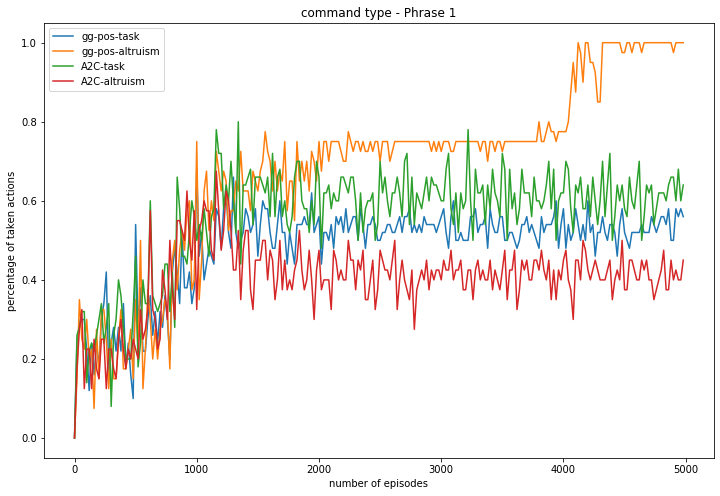

In [11]:
x_plot = [a*20 for a in range(int(nb_episodes/20))]
plt.figure(figsize=(12,8))
plt.title("command type - Phrase 1")

plt.plot(x_plot, with_gg_task_phrase1, label="gg-pos-task")
plt.plot(x_plot, with_gg_altruistic_phrase1, label="gg-pos-altruism")

plt.plot(x_plot, without_gg_task_phrase1, label="A2C-task")
plt.plot(x_plot, without_gg_altruistic_phrase1, label="A2C-altruism")

plt.xlabel('number of episodes')
plt.ylabel('percentage of taken actions')
plt.legend()
plt.show()

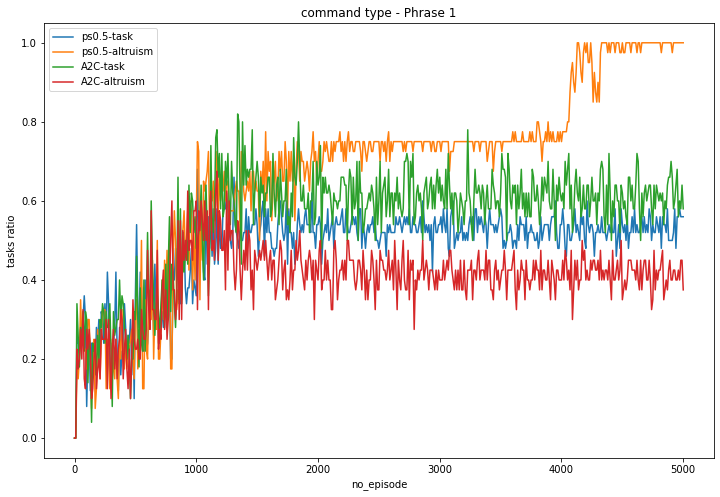

In [27]:
x_plot = [a*10 for a in range(int(nb_episodes/20)+1)]
plt.figure(figsize=(12,8))
plt.title("command type - Phrase 1")

plt.plot(x_plot, with_gg_task[0], label="ps0.5-task")
plt.plot(x_plot, with_gg_altruistic[0], label="ps0.5-altruism")

plt.plot(x_plot, without_gg_task[0], label="A2C-task")
plt.plot(x_plot, without_gg_altruistic[0], label="A2C-altruism")

plt.xlabel('no_episode')
plt.ylabel('tasks ratio')
plt.legend()
plt.show()
